In [39]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats as st
from scipy.stats import binomtest, ttest_1samp, ttest_rel, levene, ttest_ind, shapiro

In [4]:
#Решение
distr = st.norm(2400, 320)
distr = st.norm(1200,160)
delivery_cost = distr.ppf(0.25)
f"ОТВЕТ: Курьерская доставка должна стоит около {np.round(delivery_cost, 2)}"

'ОТВЕТ: Курьерская доставка должна стоит около 1092.08'

In [9]:
# Решение
n = 5000
p = 0.15
m = 715

distr = st.norm(n*p, np.sqrt(n*p*(1-p)))
res = distr.cdf(m)

f"ОТВЕТ: Вероятность получить такое или даже меньшее число переходов - {np.round(res, 3)}, т.е. около 8%. Такой исход не особо вероятен, но реален, поэтому \
претензии контент-мейкера не состоятельны, никакого обмана тут нет"

'ОТВЕТ: Вероятность получить такое или даже меньшее число переходов - 0.083, т.е. около 8%. Такой исход не особо вероятен, но реален, поэтому претензии контент-мейкера не состоятельны, никакого обмана тут нет'

In [15]:
#Решение
p_value = binomtest(47,50,0.8,alternative='greater').pvalue

f"Ответ: p_value {p_value} ниже кр.значимости в 5%, что значит мы отвергаем нуль гипотезу что эффективность не изменилась, выбираем альтернативную, что она увеличилась"

'Ответ: p_value 0.005656361012155332 ниже кр.значимости в 5%, что значит мы отвергаем нуль гипотезу что эффективность не изменилась, выбираем альтернативную, что она увеличилась'

In [28]:
from scipy.stats import levene, ttest_ind
time_on_site_logpass = [368, 113, 328, 447, 1, 156, 335, 233,308, 181, 271, 239, 411, 293, 303,206, 196, 203, 311, 205, 297, 529,373, 217, 416, 206, 1, 128, 16, 214]
time_on_site_social  = [451, 182, 469, 546, 396, 630, 206,130, 45, 569, 434, 321, 374, 149,721, 350, 347, 446, 406, 365, 203,405, 631, 545, 584, 248, 171, 309,338, 505]

#Проверим равенство дисперсий в выборках с помощью критерия Левене
levene(time_on_site_logpass,time_on_site_social)

ttest_ind(a=time_on_site_logpass, b=time_on_site_social, equal_var=True)
f"ОТВЕТ: T-тест показал p_value ниже уровня значимости в 5%, что говорит о том, что время, проведённое на сайте, для этих двух групп пользователей \
статистически отличается"

'ОТВЕТ: T-тест показал p_value ниже уровня значимости в 5%, что говорит о том, что время, проведённое на сайте, для этих двух групп пользователей статистически отличается'

In [32]:
from scipy.stats import ttest_rel
bullets_before = [821, 1164, 598, 854, 455, 1220, 161, 1400, 479, 215, 564, 159, 920, 173, 276, 444, 273, 711, 291, 880, 892, 712, 16, 476, 498, 9, 1251, 938, 389, 513]
bullets_after = [904, 220, 676, 459, 299, 659, 1698, 1120, 514, 1086, 1499, 1262, 829, 476, 1149, 996, 1247, 1117, 1324, 532, 1458, 898, 1837, 455, 1667, 898, 474, 558, 639, 1012]
ttest_rel(bullets_before, bullets_after, alternative='less')
f"ОТВЕТ: Судя по результатам t-теста, мы отвергаем нулевую гипотезу, что различий в расходе патронов игроками нет, исходим из той альтернативной гипотезы, \
что расход патронов (а следовательно и траты на их покупку) увеличился"

'ОТВЕТ: Судя по результатам t-теста, мы отвергаем нулевую гипотезу, что различий в расходе патронов игроками нет, исходим из той альтернативной гипотезы, что расход патронов (а следовательно и траты на их покупку) увеличился'

In [37]:
# Решение

distr = st.norm(100500, 3500)
p_111000 = 1 - distr.cdf(111000)
p_92000 = distr.cdf(92000)
print(f"Вероятность того, что рекламодатель заплатит бонус - {np.round(p_111000, 4)}, т.е. 0,13%, а вероятность получить от него штраф - {np.round(p_92000, 4)} \
т.е. 0,75%")

Вероятность того, что рекламодатель заплатит бонус - 0.0013, т.е. 0,13%, а вероятность получить от него штраф - 0.0076 т.е. 0,75%


0.9052757620811462
0.7314301133155823
0.5681711435317993
LeveneResult(statistic=2.0802155992390623, pvalue=0.14446549238752415)


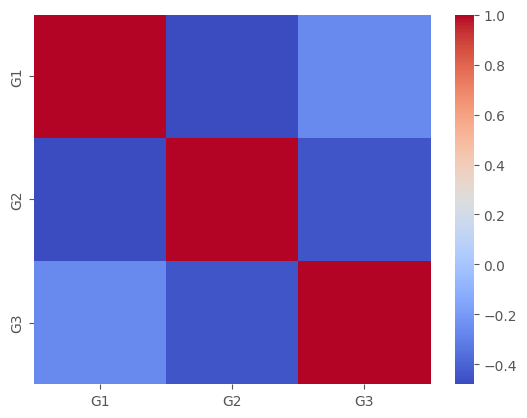

ОТВЕТ: критерий ANOVA показал pavalue > 0.05, а значит у нас нет оснований отвергнуть ноль-гипотезу, которая гласит что статистически значимого различия средних у нас нет


In [42]:
#решение
from scipy.stats import f_oneway
from scipy.stats import levene
import matplotlib.pyplot as plt
import seaborn as sns
group1 = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
group2 = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96]
group3 = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]
# # проверим на допущения, необходимые, чтобы применять ANOVA-тест

for i in list([group1,group2,group3]):
    print(shapiro(i).pvalue)
# Критерий Шапиро показал, что выборки распределены нормально
print(levene(group1,group2,group3))
# Критерий Левене говорит, что дисперсии выборок не отличаются значительно

cm =  pd.DataFrame(zip(group1,group2,group3), columns=['G1','G2','G3']).corr()

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.heatmap(cm, cmap='coolwarm')
plt.show()
#Проверка корреляции показывает, что фичи связаны друг с другом слабо

#Все допущения проверены - переходим к критерию

f_oneway(group1,group2,group3)

print("ОТВЕТ: критерий ANOVA показал pavalue > 0.05, а значит у нас нет оснований отвергнуть ноль-гипотезу, которая гласит что статистически значимого различия средних у нас нет")